# IS709 Assignment 4

### Due: January 22, Sunday-23.59

### Submission and Grading Policy

- Submit your assignments to the corresponding assignment link in https://odtuclass.metu.edu.tr.
- Solutions should be submitted in a single **ipynb** file named: metu-username_HW_4.ipynb (e.g., “e123456_HW_4.ipynb”).
- Late submissions will be accepted by January 25, 2021, 23:59 with a 5% per day penalty.
- **This is an individual assignment. You have to adhere to the academic integrity principles.**
- You are supposed to be able to interpret your findings. Hence, you shouldn't just find a number or result and just leave it. You need to comment on your findings by giving as much as **necessary** details.    

# Questions
## Q1.
For the following use data in file q1_data.csv that consists of 40 feature columns (x1 .. x40) and target variable y.

**a (20 pts).** 

    Randomly take samples of size 100, 150, 200, ...., 950, 1000 (i.e., incrementing sample sizes by 50) from the given dataset, apply train-test split (%70 train-%30 test), fit a multiple linear regression model, evaluate the mean square performance of the model on the train and test sets and plot results. Discuss the results.    

    Are the performances on the train and test sets similar for different sample sizes? If not, why are the performances on the train set better/worse than the performance on the test set for small and large sample sizes? If you had more examples in the dataset would the performance improve? 
   
    Does regularization improve the performance of the test set? Briefly explain your reasoning.       
  

**b (20 pts).**
    
    Repeat part (a) after applying polynomial expansion with degree=2 and set to the given dataset.(Do not include bias i.e., set parameter include_bias=False)

**c (20 pts).**

    Use Lasso regularization and try to fit the best possible model to the given dataset. When necessary you can use (%70 train - %30 test) or (%60 train - %20 validation - %20 test) splits. Report the model performance on the train/validation/test sets. 
    
    What is the regression equation for the best model (consider only the significant coefficients - compared to the largest coefficients)

In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics 
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


In [9]:
df=pd.read_csv(r'C:\Users\gulsum.budakoglu\Downloads\q1_data.csv')

### part a

In [15]:
results = pd.DataFrame(columns =['train_error', 'test_error', 'model', 'size']).set_index('size')


print ('Randomly take samples of size 50 to 1000=>')
for size in range(50,1001, 50):
    sample = df.sample(n=size, random_state=1)
    X = sample.iloc[:, :-1].values
    y = sample.iloc[:, -1].values
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)
    
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    
    y_pred = regressor.predict(X_test)
    
    y_pred_train = regressor.predict(X_train)
    
    test_error = metrics.mean_squared_error(y_test, y_pred)
    train_error = metrics.mean_squared_error(y_train, y_pred_train)
    
    results.loc[size] = train_error, test_error, regressor
    
results

    #print('Mean Squared Error:',  metrics.mean_squared_error(y_test, y_pred))


Randomly take samples of size 50 to 1000=>


train_error  test_error               model
size                                              
50    9.809585e-28   74.544390  LinearRegression()
100   2.695500e+00   14.766978  LinearRegression()
150   3.822463e+00    9.379023  LinearRegression()
200   5.064987e+00    8.260727  LinearRegression()
250   4.839934e+00   10.628142  LinearRegression()
300   5.650585e+00   10.181128  LinearRegression()
350   5.983976e+00    8.404781  LinearRegression()
400   5.563155e+00    9.818694  LinearRegression()
450   5.897382e+00    7.667577  LinearRegression()
500   6.101554e+00    8.377569  LinearRegression()
550   6.209688e+00    8.266643  LinearRegression()
600   6.419165e+00    7.538810  LinearRegression()
650   6.247288e+00    7.315945  LinearRegression()
700   6.487223e+00    7.255918  LinearRegression()
750   6.449012e+00    7.926206  LinearRegression()
800   6.738211e+00    6.846194  LinearRegression()
850   6.825613e+00    7.273110  LinearRegression()
900   6.720363e+00    7.287113  LinearRegression()
950   6.771469e+00    6.927094  LinearRegression()
1000  6.647318e+00    7.041621  LinearRegression()

Text(0.5, 1.0, 'part (a) train-testing errors')

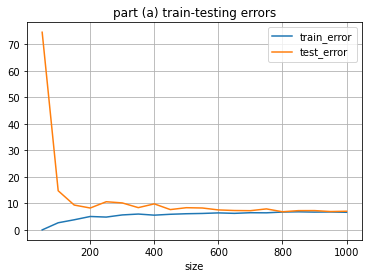

In [23]:
results.plot()
plt.grid()
plt.title("part (a) train-testing errors")

#### with plotting training and testing errors we can see model size and their changing. we can see that in first step until 200 size population, test error decreasing dramaticly but train error increases a little. and they go like stable after 200 size. we can say that sıze of 200 is enough for our dataset


####   With more pupulation, test_error is decreasing. The learning curve working in your advantage, ie. you can train better models given more data for testing thus test_error is decreasing. Moreover, train_error increasing because it is harder for the model (with a fixed complexity) to overfit to a bigger training set. After one point, performance stay same. In some situation, increasing the number of population does not means to improve performance of model.

####  Regularization does NOT improve the performance on the data set that the algorithm used to learn the model parameters (feature weights). However, it can improve the generalization performance, i.e., the performance on new, unseen data, which is exactly what we want. In intuitive terms, we can think of regularization as a penalty against complexity. Increasing the regularization strength penalizes “large” weight coefficients – our goal is to prevent that our model picks up “peculiarities,” “noise,” or “imagines a pattern where there is none.”

### part b


In [20]:

results1 = pd.DataFrame(columns =['train_error1', 'test_error1', 'model1', 'size1']).set_index('size1')

for size in range(50,1000, 50):
    sample = df.sample(n=size, random_state=1)
    X = sample.iloc[:, :-1].values
    y = sample.iloc[:, -1].values
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)
    
    regressor = make_pipeline(PolynomialFeatures(degree=2), LinearRegression(fit_intercept = False))
    regressor.fit(X_train, y_train)
    
    y_pred = regressor.predict(X_test)
    
    y_pred_train = regressor.predict(X_train)
    
    test_error = metrics.mean_squared_error(y_test, y_pred)
    train_error = metrics.mean_squared_error(y_train, y_pred_train)
    
    results1.loc[size] = train_error, test_error, regressor
    
    
    #print('Mean Squared Error:',  metrics.mean_squared_error(y_test, y_pred))
 

In [21]:
results1

train_error1  test_error1  \
size1                              
50     2.062697e-26   182.518866   
100    5.197889e-27   259.151633   
150    2.152287e-27   233.031456   
200    3.450992e-27   214.910863   
250    3.783241e-27   216.374402   
300    4.619606e-27   167.671730   
350    2.630606e-27   161.324026   
400    6.532476e-27   129.533477   
450    8.949015e-27   126.963729   
500    6.877607e-27    98.867871   
550    3.474266e-27    87.578676   
600    1.004542e-26    80.475561   
650    6.882777e-27    62.803964   
700    5.560329e-27    54.588905   
750    7.217580e-27    44.774643   
800    3.260831e-27    37.055881   
850    4.256739e-27    36.326958   
900    3.947197e-27    21.837292   
950    1.019028e-26    19.776313   

                                                  model1  
size1                                                     
50     (PolynomialFeatures(), LinearRegression(fit_in...  
100    (PolynomialFeatures(), LinearRegression(fit_in...  
150    (PolynomialFeatures(), LinearRegression(fit_in...  
200    (PolynomialFeatures(), LinearRegression(fit_in...  
250    (PolynomialFeatures(), LinearRegression(fit_in...  
300    (PolynomialFeatures(), LinearRegression(fit_in...  
350    (PolynomialFeatures(), LinearRegression(fit_in...  
400    (PolynomialFeatures(), LinearRegression(fit_in...  
450    (PolynomialFeatures(), LinearRegression(fit_in...  
500    (PolynomialFeatures(), LinearRegression(fit_in...  
550    (PolynomialFeatures(), LinearRegression(fit_in...  
600    (PolynomialFeatures(), LinearRegression(fit_in...  
650    (PolynomialFeatures(), LinearRegression(fit_in...  
700    (PolynomialFeatures(), LinearRegression(fit_in...  
750    (PolynomialFeatures(), LinearRegression(fit_in...  
800    (PolynomialFeatures(), LinearRegression(fit_in...  
850    (PolynomialFeatures(), LinearRegression(fit_in...  
900    (PolynomialFeatures(), LinearRegression(fit_in...  
950    (PolynomialFeatures(), LinearRegression(fit_in...

Text(0.5, 1.0, 'part (b) train-testing errors')

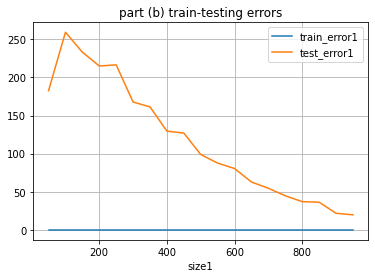

In [24]:
results1.plot()
plt.grid()
plt.title("part (b) train-testing errors")

#### the train error stays same so there can be overfitting. As sample size is incresing, the overfitting issue may be overcomed. The learning curve working in your advantage, ie. you can train better models given more data for testing thus test error is decreasing. We can change degrre of polynomial expention

###  part c

In [37]:
X = sample.iloc[:, :-1].values
y = sample.iloc[:, -1].values
    
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print("Mean Square Error for training",np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print("R2 for training",r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print("Mean Square Error for testing",np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print("R2 for testing",r2_score(y_test, pred_test_lasso))

Mean Square Error for training 2.6045214337006177
R2 for training 0.9852870968560583
Mean Square Error for testing 2.610076780873246
R2 for testing 0.9852783880282705


In [38]:
model_lasso.coef_

array([-4.53964756e-01,  9.98011741e+00, -1.22998487e-01, -2.02312273e+01,
        2.62832535e-02, -1.96664754e-02,  1.50794897e+01,  1.47441121e-01,
       -1.12000606e-01, -1.06613557e-01,  5.52062354e-01, -1.17556660e-01,
       -2.48829923e+01, -9.81211200e-02, -1.54359900e-01,  1.31260255e-01,
       -9.43226552e-03,  7.80264468e-02, -2.86193770e-02, -2.16701789e-01,
       -0.00000000e+00, -2.46831510e-01,  2.28311658e-01,  2.20890638e-01,
        6.15899407e-03, -9.58418690e-02, -1.60651167e-02, -0.00000000e+00,
        1.73152676e-01, -2.43218254e-02,  1.79260160e-01,  4.67462039e-03,
       -1.85066252e-01,  1.28642669e-01, -2.18151572e-01, -1.40937657e-01,
        8.65102733e-02, -4.74033157e-02,  1.66700953e-02, -2.56905128e-01])

##### we can see that in lasso model, we havre alpha = 0.01. if we increse the alpha our coefficents goes to the zero but our erros (mse,r2) will same similar. 

# Q2

In the given q2 _data.csv, x is the only feature and y is the target variable.

**a (20 pts).** 

    Fit the best possible linear regression model to predict y in terms of x. You may apply polynomial expansion (try up to degree=15) but do not use regularization. If you find several models providing almost the same performance, choose the least complex model among them. When necessary you can use (%70 train - %30 test) or (%60 train - %20 validation - %20 test) splits. Report the model performance on the train/validation/test sets. Give the regression equation for the best model as y = f(x)=c0 + c1*x + c2*x^2 + ... ck*x^k.

**b (20 pts).**
    
    Use the regression equation given in part (a) to find y value for x=1. Assume this is the correct value returned by the population function that is approximated by f(x) found in part (a). Then, apply the following procedure to fit several models with degree 1..0 by taking a sample of size 20 from the given dataset and predict y at x = 1:

    for d in range(1,11):
        add polynomial features up to degree d
        pred = []
        for i in range(1000):
            take a sample of size 20 rows from the dataset with added polynomial features
            fit a linear regression model (do not apply train/test split)
            predict the value of y at x = 1 
            append y to pred list
        find and print d, and the mean and the standard deviation of pred list (i.e., 1000 predictions for degree=d)
          
    Compare the mean prediction found with the value returned by the function found in part (a) and standard deviations of the predictions made for different degrees. Comment on the obtained results.   


In [34]:
from pandas import read_csv
import pandas as  pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [27]:

dataset=pd.read_csv(r'C:\Users\gulsum.budakoglu\Downloads\q2_data (1).csv')
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
#X = X.astype('float32')



In [28]:
dataset

x          y
0    0.684160  13.740372
1    0.000361  14.011864
2    0.549993  13.961843
3    0.375798  14.620038
4    0.073580  14.824662
..        ...        ...
995  0.253179  15.129985
996  0.103039  14.995572
997  0.347782  14.818604
998  0.714970  13.731271
999  1.305436  14.971224

[1000 rows x 2 columns]

Degree: 1, Features: 2
Mean Squared Error: 0.5738987644530381
R2 Score: 0.22589426982864946


Degree: 2, Features: 3
Mean Squared Error: 0.38188332820239246
R2 Score: 0.6572392373174787


Degree: 3, Features: 4
Mean Squared Error: 0.3800068882275519
R2 Score: 0.6605993727005718


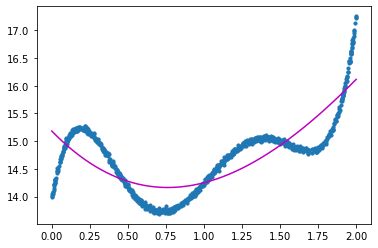

Degree: 4, Features: 5
Mean Squared Error: 0.37996106589009515
R2 Score: 0.6606812195980799


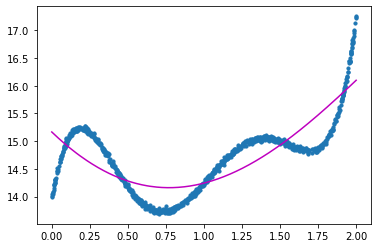

Degree: 5, Features: 6
Mean Squared Error: 0.02571789131560035
R2 Score: 0.998445465316746


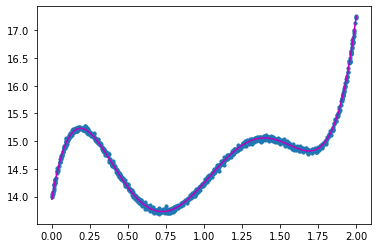

Degree: 6, Features: 7
Mean Squared Error: 0.025704507127837166
R2 Score: 0.9984470829276006


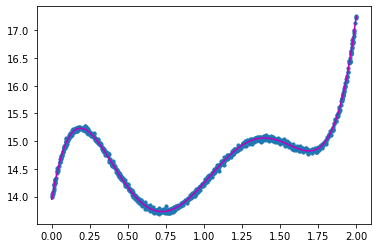

Degree: 7, Features: 8
Mean Squared Error: 0.02569934103450067
R2 Score: 0.9984477070756006


Degree: 8, Features: 9
Mean Squared Error: 0.025682656487227208
R2 Score: 0.9984497219831004


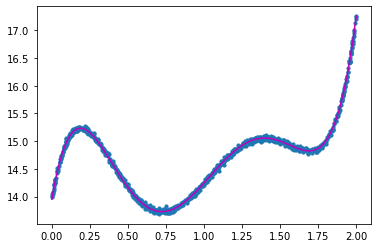

Degree: 9, Features: 10
Mean Squared Error: 0.02568212119125644
R2 Score: 0.9984497866063943


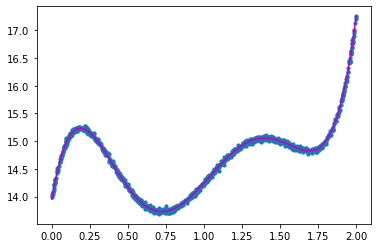

Degree: 10, Features: 11
Mean Squared Error: 0.025667464979288717
R2 Score: 0.998451555445732


Degree: 11, Features: 12
Mean Squared Error: 0.025656291623814165
R2 Score: 0.9984529032652939


Degree: 12, Features: 13
Mean Squared Error: 0.025639883609452237
R2 Score: 0.9984548814676487


Degree: 13, Features: 14
Mean Squared Error: 0.02563982676760423
R2 Score: 0.998454888318483


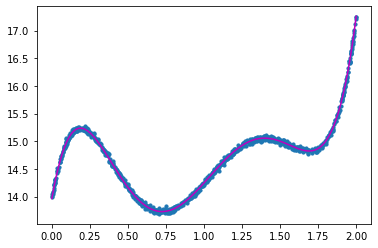

Degree: 14, Features: 15
Mean Squared Error: 0.025619817818558058
R2 Score: 0.9984572989430135


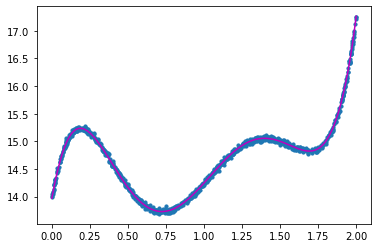

Degree: 15, Features: 16
Mean Squared Error: 0.02560370418569782
R2 Score: 0.9984592389022448


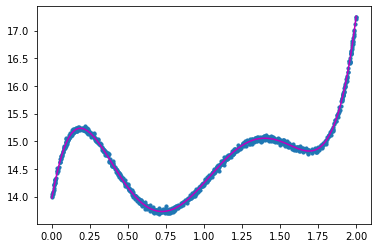

In [29]:
# calculate change in number of features
num_features = list()
degress = [i for i in range(1, 16)]
models = []
for d in degress:
 # create transform
    trans = PolynomialFeatures(degree=d)
 # fit and transform
    data = trans.fit_transform(X)
# record number of features
    num_features.append(data.shape[1])
# summarize
    print('Degree: %d, Features: %d' % (d, data.shape[1]))
    x = X
    polynomial_features= PolynomialFeatures(degree=d)
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression(fit_intercept = False)
    model.fit(x_poly, y)
    
    models.append(model)
    
    y_poly_pred = model.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    print('Mean Squared Error:',rmse)
    print("R2 Score:",r2)

    plt.scatter(x, y, s=10)
# sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    plt.plot(x, y_poly_pred, color='m')
    plt.show()

# plot degree vs number of features
#pyplot.plot(degress, num_features)


#pyplot.show()


#### we can see that after the degree 5 model have similar results. Thus, we can choose degree 5 for our model with Degree: 5, Features: 6, Mean Squared Error: 0.02571789131560035, R2 Score: 0.998445465316746

In [30]:
# coefs of degree 5
coefs = models[4].coef_
coefs

array([ 13.94804386,  16.12082625, -64.37365209,  88.50261294,
       -49.94090174,   9.98741703])

#### we have function  y = f(x)=c0 + c1*x + c2*x^2 + c3*x^3  + c4*x^4 + c5*x^5 with degree 5. We have coeficients  13.94804386,  16.12082625, -64.37365209,  88.50261294,  -49.94090174,   9.98741703. respectively c0, c1, c2, c3, c4, c5.

### part (b):

In [32]:
# define funtion to evaluate f
def fun (x):
    coefs
    x_v = [x**i for i in range (0,6) ]
    return np.dot(x_v,coefs)




In [33]:
#finding y for x = 1
result_for_y = fun (dataset.loc[1,'x'])
result_for_y

13.953848084244994